In [210]:
%matplotlib inline

In [211]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [212]:
os.getcwd()

'/Users/emilyzinn/Desktop'

In [213]:
# Load in csv
csv_path = os.path.join(os.getcwd(),'accidents.csv')
    

In [214]:
df = pd.read_csv(csv_path)

In [215]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [216]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [217]:
# look for missing values
df.count()

ID                       2906610
Severity                 2906610
Start_Time               2906610
End_Time                 2906610
Start_Lat                2906610
Start_Lng                2906610
End_Lat                  2623789
End_Lng                  2623789
Distance(mi)             2906610
Description              2906610
Number                   1014938
Street                   2906610
Side                     2906610
City                     2906502
County                   2906610
State                    2906610
Zipcode                  2905496
Country                  2906610
Timezone                 2903180
Airport_Code             2900002
Weather_Timestamp        2859693
Temperature(F)           2839386
Wind_Chill(F)            1722751
Humidity(%)              2835340
Pressure(in)             2849702
Visibility(mi)           2834532
Wind_Direction           2843136
Wind_Speed(mph)          2599447
Precipitation(in)        1605284
Weather_Condition        2834759
Amenity   

In [218]:
 # drop null rows
no_null_df = df.dropna(how='any')

In [219]:
# verify counts
no_null_df.count()

ID                       524391
Severity                 524391
Start_Time               524391
End_Time                 524391
Start_Lat                524391
Start_Lng                524391
End_Lat                  524391
End_Lng                  524391
Distance(mi)             524391
Description              524391
Number                   524391
Street                   524391
Side                     524391
City                     524391
County                   524391
State                    524391
Zipcode                  524391
Country                  524391
Timezone                 524391
Airport_Code             524391
Weather_Timestamp        524391
Temperature(F)           524391
Wind_Chill(F)            524391
Humidity(%)              524391
Pressure(in)             524391
Visibility(mi)           524391
Wind_Direction           524391
Wind_Speed(mph)          524391
Precipitation(in)        524391
Weather_Condition        524391
Amenity                  524391
Bump    

In [220]:
# Check for similar values in Weather Conditions
no_null_df["Weather_Condition"].unique()

array(['Fair', 'Cloudy', 'Mostly Cloudy', 'Wintry Mix', 'Light Snow',
       'Partly Cloudy', 'Smoke', 'Light Rain', 'Fair / Windy',
       'Light Drizzle', 'Cloudy / Windy', 'Fog', 'Rain', 'Shallow Fog',
       'Light Snow / Windy', 'Haze', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Heavy Rain', 'Thunder', 'Snow',
       'Haze / Windy', 'Patches of Fog', 'Heavy T-Storm', 'T-Storm',
       'Light Rain / Windy', 'Overcast', 'Mostly Cloudy / Windy',
       'Thunder in the Vicinity', 'Heavy Snow', 'Small Hail',
       'Light Freezing Rain', 'Rain / Windy', 'Drizzle',
       'Heavy Rain / Windy', 'Snow / Windy', 'Fog / Windy', 'Clear',
       'Heavy Drizzle', 'Light Freezing Fog', 'Smoke / Windy', 'Mist',
       'Sleet', 'Light Drizzle / Windy', 'Squalls / Windy',
       'Drizzle and Fog', 'Light Rain Shower', 'Squalls',
       'Light Freezing Drizzle', 'Blowing Dust / Windy',
       'Light Snow with Thunder', 'Heavy T-Storm / Windy',
       'Thunder / Windy', 'T-Storm / W

In [221]:
# Combining similar conditions together
no_null_df = no_null_df.replace(
    {'Partly Cloudy': 'Cloudy', 'Mostly Cloudy': 'Cloudy', 'Partly Cloudy / Windy': 'Cloudy', 'Cloudy / Windy' : 'Cloudy', 'Overcast': 'Cloudy', 'Mostly Cloudy / Windy' :'Cloudy', 
     'Scattered Clouds' : 'Cloudy', 'Clear' :'Fair', 'Smoke' : 'Fog', 'Shallow Fog':'Fog', 'Haze': 'Fog', 'Haze / Windy': 'Fog', 'Patches of Fog': 'Fog', 'Fog / Windy': 'Fog', 
    'Light Freezing Fog' : 'Fog', 'Partial Fog' : 'Fog', 'Fair / Windy': 'Fair', 'Light Drizzle' :'Light Rain', 'Light Rain with Thunder':'Light Rain', 
     'Light Rain / Windy':'Light Rain', 'Drizzle':'Light Rain', 'Mist': 'Light Rain', 'Light Drizzle / Windy': 'Light Rain', 'N/A Precipitation' : 'Fair', 
    'Drizzle and Fog' : 'Light Rain', 'Light Rain Shower' : 'Light Rain', 'Showers in Vacinity': 'Light Rain', 'Light Thunderstorms and Rain':'Light Rain', 
     'Drizzle / Windy': 'Light Rain', 'Wintry Mix' : 'Light Snow', 'Light Snow / Windy': 'Light Snow', 'Light Freezing Rain':'Light Snow', 'Snow / Windy':'Light Snow', 
     'Sleet':'Light Snow', 'Light Freezing Drizzle':'Light Snow', 'Light Snow with Thunder':'Light Snow', 'Light Sleet': 'Light Snow', 'Snow and Sleet / Windy':'Light Snow',
    'Wintry Mix / Windy':'Light Snow', 'Light Snow and Sleet':'Light Snow', 'Light Freezing Rain':'Light Snow', 'Light Snow Grains':'Light Snow', 'Light Blowing Snow':'Light Snow',
    'Light Snow and Sleet / Windy': 'Light Snow', 'Rain / Windy':'Rain', 'Test Replace':'Low Visibility (Fog/Smoke)', 'Smoke / Windy':'Low Visibility (Fog/Smoke)', 
    'Blowing Dust / Windy' :'Low Visibility (Fog/Smoke)', 'Blowing Dust': 'Low Visibility (Fog/Smoke)', 'Sand / Dust Whirlwinds' :'Low Visibility (Fog/Smoke)', 
    'Widespread Dust':'Low Visibilty (Fog/Smoke)', 'Light Rain':'Light/Moderate Rain', 'Rain': 'Light/Moderate Rain', 'Showers in the Vicinity':'Light/Moderate Rain', 
    'Rain Shower':'Light/Moderate Rain', 'Heavy Rain':'Heavy Rain/Severe Storms', 'Thunder':'Heavy Rain/Severe Storms', 'Heavy T-Storm':'Heavy Rain/Severe Storms', 
    'T-Storm':'Heavy Rain/Severe Storms', 'Thunder in the Vicinity': 'Heavy Rain/Severe Storms', 'Small Hail': 'Heavy Rain/Severe Storms', 
    'Heavy Rain / Windy':'Heavy Rain/Severe Storms', 'Heavy Drizzle':'Heavy Rain/Severe Storms', 'Squalls / Windy':'Heavy Rain/Severe Storms', 'Squalls': 'Heavy Rain/Severe Storms', 
    'Heavy T-Storm / Windy':'Heavy Rain/Severe Storms', 'Thunder / Windy':'Heavy Rain/Severe Storms', 'T-Storm / Windy':'Heavy Rain/Severe Storms', 
     'Heavy Thunderstorms and Rain': 'Heavy Rain/Severe Storms', 'Light Snow':'Light/Moderate Winter Precip',
    'Snow' : 'Light/Moderate Winter Precip', 'Fog':'Low Visibility (Fog/Smoke)', 'Light Ice Pellets' : 'Light/Moderate Winter Precip', 
    'Blowing Snow':'Light/Moderate Winter Precip', 'Light Freezing Rain / Windy' : 'Light/Moderate Winter Precip', 'Blowing Snow / Windy' : 'Light/Moderate Winter Precip', 'Ice Pellets':
    'Light/Moderate Winter Precip', 'Light Thunderstorms and Snow': 'Light/Moderate Winter Precip', 'Heavy Snow' :'Heavy Winter Precip', 'Heavy Snow / Windy': 'Heavy Winter Precip', 'Heavy Sleet' :
    'Heavy Winter Precip', 'Thunder / Wintry Mix / Windy': 'Heavy Winter Precip' , 'Heavy Freezing Rain' : 'Heavy Winter Precip', 'Thunderstorms and Rain' : 'Heavy Rain/Severe Storms', 
    'Thunderstorm' : 'Heavy Rain/Severe Storms', 'Low Visibilty (Fog/Smoke)': 'Low Visibility (Fog/Smoke)'})
no_null_df["Weather_Condition"].unique()

array(['Fair', 'Cloudy', 'Light Snow', 'Light/Moderate Winter Precip',
       'Fog', 'Light/Moderate Rain', 'Light Rain',
       'Low Visibility (Fog/Smoke)', 'Heavy Rain/Severe Storms',
       'Heavy Winter Precip', 'Rain', 'Low Visibilty (Fog/Smoke)'],
      dtype=object)

In [222]:
condensed_condition_df= no_null_df
condensed_condition_df["Weather_Condition"].unique()

array(['Fair', 'Cloudy', 'Light Snow', 'Light/Moderate Winter Precip',
       'Fog', 'Light/Moderate Rain', 'Light Rain',
       'Low Visibility (Fog/Smoke)', 'Heavy Rain/Severe Storms',
       'Heavy Winter Precip', 'Rain', 'Low Visibilty (Fog/Smoke)'],
      dtype=object)

In [223]:
condensed_condition_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
10,A-11,2,2019-12-20 08:20:12,2019-12-20 10:05:05,28.021709,-82.203583,28.021709,-82.203583,0.000,Restrictions due to accident on US-92 at Bethl...,...,False,False,False,False,False,False,Day,Day,Day,Day
15,A-16,2,2019-04-11 16:35:14,2019-04-11 18:59:25,29.723339,-95.497337,29.723339,-95.497337,0.000,Accident on Westpark Dr at 14th St.,...,False,False,False,False,True,False,Day,Day,Day,Day
17,A-18,2,2020-11-21 16:32:00,2020-11-21 20:18:30,34.186595,-117.439427,34.185871,-117.439039,0.055,Incident on SIERRA AVE near LYTLE CREEK RD Exp...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [224]:
cond_group = condensed_condition_df.groupby('Weather_Condition')

In [225]:
type(cond_group)

pandas.core.groupby.generic.DataFrameGroupBy

In [226]:
count_cond = cond_group['Weather_Condition'].count()

In [227]:
count_cond

Weather_Condition
Cloudy                          208394
Fair                            244560
Fog                               6664
Heavy Rain/Severe Storms          5415
Heavy Winter Precip                252
Light Rain                        4106
Light Snow                        1508
Light/Moderate Rain              32469
Light/Moderate Winter Precip     10412
Low Visibility (Fog/Smoke)       10383
Low Visibilty (Fog/Smoke)            7
Rain                               221
Name: Weather_Condition, dtype: int64

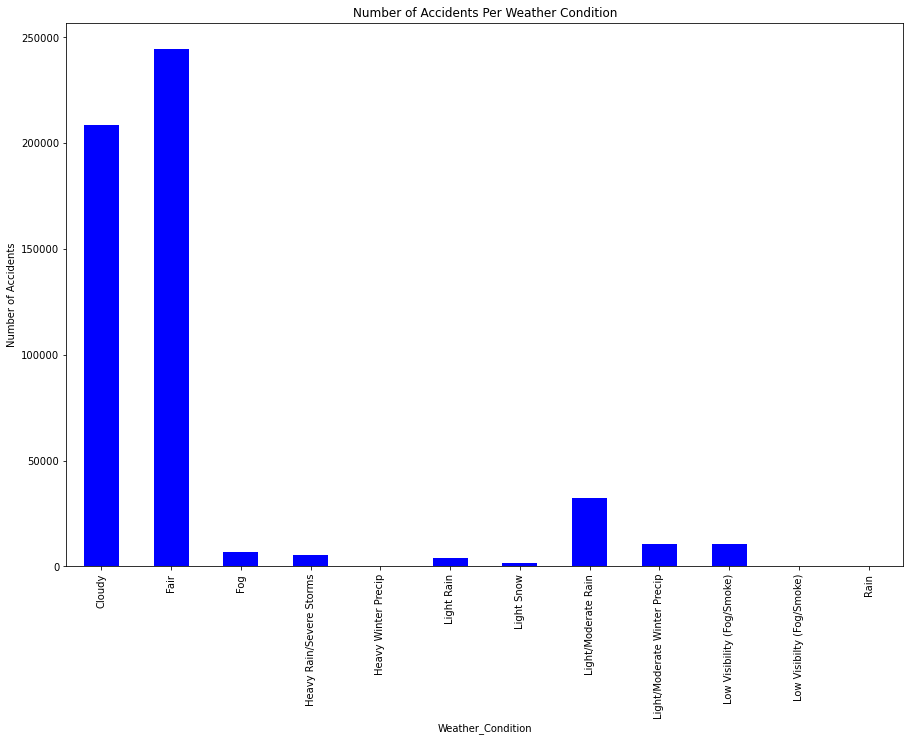

<Figure size 432x288 with 0 Axes>

In [228]:
count_cond.plot(x='Weather Condition', kind='bar', color ='blue', ylabel='Number of Accidents', title = 'Number of Accidents Per Weather Condition', figsize=(15,10))

plt.show()
plt.savefig("Acc_vs_Cond.png")

In [ ]:



labels = cond_group['Weather Condition']
sev = cond_group["Severity"]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [229]:
lat = condensed_condition_df['Start_Lat']
lon = condensed_condition_df['Start_Lng']

color = {
    
}

In [237]:
sns.lmplot(x= lat, y= lon, data=condensed_condition_df, hue='Weather_Condition', fit_reg=True)

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().